# Basic Dataset with  CausalML Meta-learners

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings

import causalml
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor, BaseXClassifier
from causalml.inference.nn import DragonNet
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *


from sklift.metrics import auqc, auuc, uplift_at_k
from sklift.viz import plot_uplift_preds, plot_uplift_qini_curves
import seaborn as sns
sns.set(style="white") # white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
Using TensorFlow backend.


In [4]:
filepath = '/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/'
basic_df = pd.read_csv(filepath + 'opossum_sim_basic.csv')

In [5]:
#holdout for final performance eval
dev_df, holdout_df = train_test_split(basic_df, test_size=0.1)

In [6]:
holdout_df = holdout_df.reset_index(drop=True)

In [7]:
holdout_df.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,response_cont,exposed,true_lift,response_cont_prior,conversion,conversion_post,segments
0,1.00,0.00,1.00,1.00,-0.26,-0.99,-0.07,-0.78,0.12,-1.54,-1.73,0,0.00,-1.73,0,0,lost_cause
1,1.00,0.00,0.00,0.00,1.22,0.14,2.30,-0.83,0.38,0.54,-3.43,1,-2.00,-1.43,0,0,lost_cause
2,0.00,0.00,1.00,1.00,0.86,-3.83,1.22,2.76,-3.93,0.16,0.22,1,0.91,-0.70,0,0,lost_cause
3,0.00,1.00,0.00,0.00,-3.39,0.44,-0.35,-2.00,0.12,-0.77,-0.34,0,0.00,-0.34,0,0,lost_cause
4,1.00,0.00,0.00,0.00,0.32,0.04,3.82,1.20,-0.40,0.60,0.23,0,0.00,0.23,0,0,lost_cause


In [8]:
x_train = dev_df.iloc[:,1:10]
y_train = dev_df['conversion_post']
t_train = dev_df['exposed']

In [65]:
#T Learner Linear Regression
learner_t = BaseTRegressor(learner=LinearRegression(normalize=True))
learner_t.fit(X=x_train, treatment=t_train, y=y_train)
t_lr_pred = learner_t.predict(holdout_df.iloc[:,1:10]).flatten()

In [66]:
#T LearnerKNearestRegressor
learner_t = BaseTRegressor(learner=KNeighborsRegressor(n_neighbors=10))
learner_t.fit(X=x_train, treatment=t_train, y=y_train)
t_knr_pred = learner_t.predict(holdout_df.iloc[:,1:10]).flatten()

In [67]:
#T Learner Light GBM
learner_t = BaseTRegressor(learner=LGBMRegressor())
learner_t.fit(X=x_train, treatment=t_train, y=y_train)
t_lgbm_pred = learner_t.predict(holdout_df.iloc[:,1:10]).flatten()

In [68]:
#T Learner XGB
learner_t = BaseTRegressor(learner=XGBRegressor())
learner_t.fit(X=x_train, treatment=t_train, y=y_train)
t_xgb_pred = learner_t.predict(holdout_df.iloc[:,1:10]).flatten()

[13:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
#X Learner Linear Regression
learner_x = BaseXRegressor(learner=LinearRegression(normalize=True))
learner_x.fit(X=x_train, treatment=t_train, y=y_train)
x_lr_pred = learner_x.predict(holdout_df.iloc[:,1:10]).flatten()

In [70]:
#X Learner KNearestRegressor
learner_x = BaseXRegressor(learner=KNeighborsRegressor(n_neighbors=10))
learner_x.fit(X=x_train, treatment=t_train, y=y_train)
x_knr_pred = learner_x.predict(holdout_df.iloc[:,1:10]).flatten()

In [71]:
#X Learner light gbm
learner_x = BaseXRegressor(learner=LGBMRegressor())
learner_x.fit(X=x_train, treatment=t_train, y=y_train)
x_lgbm_pred = learner_x.predict(holdout_df.iloc[:,1:10]).flatten()

In [72]:
#X Learner XGB
learner_x = BaseXRegressor(learner=XGBRegressor())
learner_x.fit(X=x_train, treatment=t_train, y=y_train)
x_xgb_pred = learner_x.predict(holdout_df.iloc[:,1:10]).flatten()

[13:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
dragon = DragonNet(neurons_per_layer=200, targeted_reg=True)
dragon.fit(X=x_train, treatment=t_train, y=y_train)
dragon_pred = dragon.predict(holdout_df.iloc[:,1:10]).flatten()

Train on 36000 samples, validate on 9000 samples
Epoch 1/30
36000/36000 [==============================] - 6s 162us/step - loss: 72.2462 - regression_loss: 11.9409 - binary_classification_loss: 44.4838 - treatment_accuracy: 0.5024 - track_epsilon: 0.0049 - val_loss: 69.9450 - val_regression_loss: 11.3052 - val_binary_classification_loss: 44.3446 - val_treatment_accuracy: 0.4953 - val_track_epsilon: 7.6367e-05
Epoch 2/30
36000/36000 [==============================] - 4s 102us/step - loss: 69.6807 - regression_loss: 11.4832 - binary_classification_loss: 44.3775 - treatment_accuracy: 0.5065 - track_epsilon: 9.1512e-04 - val_loss: 68.6656 - val_regression_loss: 11.2896 - val_binary_classification_loss: 44.2635 - val_treatment_accuracy: 0.5005 - val_track_epsilon: 0.0024
Epoch 3/30
36000/36000 [==============================] - 3s 78us/step - loss: 68.6063 - regression_loss: 11.4055 - binary_classification_loss: 44.3737 - treatment_accuracy: 0.5022 - track_epsilon: 0.0011 - val_loss: 67.769

Epoch 29/300
36000/36000 [==============================] - 4s 124us/step - loss: 65.8700 - regression_loss: 10.7423 - binary_classification_loss: 44.2944 - treatment_accuracy: 0.5101 - track_epsilon: 0.0026 - val_loss: 65.8310 - val_regression_loss: 10.7194 - val_binary_classification_loss: 44.2992 - val_treatment_accuracy: 0.4934 - val_track_epsilon: 0.0013
Epoch 30/300
36000/36000 [==============================] - 4s 125us/step - loss: 65.8628 - regression_loss: 10.7401 - binary_classification_loss: 44.2966 - treatment_accuracy: 0.5084 - track_epsilon: 0.0024 - val_loss: 65.8248 - val_regression_loss: 10.7216 - val_binary_classification_loss: 44.2766 - val_treatment_accuracy: 0.4984 - val_track_epsilon: 0.0047
Epoch 31/300
36000/36000 [==============================] - 4s 120us/step - loss: 65.8687 - regression_loss: 10.7421 - binary_classification_loss: 44.2960 - treatment_accuracy: 0.5102 - track_epsilon: 0.0025 - val_loss: 65.8182 - val_regression_loss: 10.7186 - val_binary_clas

36000/36000 [==============================] - 4s 122us/step - loss: 65.8210 - regression_loss: 10.7234 - binary_classification_loss: 44.2877 - treatment_accuracy: 0.5127 - track_epsilon: 0.0010 - val_loss: 65.8235 - val_regression_loss: 10.7171 - val_binary_classification_loss: 44.2946 - val_treatment_accuracy: 0.4941 - val_track_epsilon: 0.0020
Epoch 74/300
36000/36000 [==============================] - 5s 134us/step - loss: 65.8189 - regression_loss: 10.7237 - binary_classification_loss: 44.2877 - treatment_accuracy: 0.5130 - track_epsilon: 6.1712e-04 - val_loss: 65.8191 - val_regression_loss: 10.7168 - val_binary_classification_loss: 44.2934 - val_treatment_accuracy: 0.4929 - val_track_epsilon: 7.7681e-04
Epoch 75/300
36000/36000 [==============================] - 5s 144us/step - loss: 65.8161 - regression_loss: 10.7236 - binary_classification_loss: 44.2878 - treatment_accuracy: 0.5135 - track_epsilon: 4.1822e-04 - val_loss: 65.8140 - val_regression_loss: 10.7146 - val_binary_class

In [10]:
#R Learner
learner_R = BaseRRegressor(learner=XGBRegressor())
learner_R.fit(X=x_train, treatment=t_train, y=y_train)
r_xgb_pred = learner_R.predict(holdout_df.iloc[:,1:10]).flatten()

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.

In [118]:
pred_df = pd.merge(holdout_df,pd.DataFrame(t_xgb_pred, columns=['T_XGB']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(t_lr_pred, columns=['T_LR']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(t_knr_pred, columns=['T_KNR']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(t_lgbm_pred, columns=['T_LGBM']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(x_xgb_pred, columns=['X_XGB']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(x_lr_pred, columns=['X_LR']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(x_knr_pred, columns=['X_KNR']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(x_lgbm_pred, columns=['X_LGBM']), left_index=True, right_index=True) 
pred_df = pd.merge(pred_df,pd.DataFrame(dragon_pred, columns=['Dragon']), left_index=True, right_index=True) 
pred_df['random_prediction'] = pd.DataFrame(np.random.uniform(-1,1,len(pred_df['conversion_post'])))

In [151]:
pred_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,T_XGB,T_LR,T_KNR,T_LGBM,X_XGB,X_LR,X_KNR,X_LGBM,Dragon,random_prediction
0,1.00,0.00,0.00,0.00,2.01,0.49,2.57,0.94,0.39,0.14,...,0.24,0.24,-0.10,0.14,0.25,0.24,0.00,0.20,0.68,-0.06
1,0.00,1.00,0.00,1.00,-1.88,0.21,-2.17,-2.72,-2.84,0.69,...,0.37,0.42,0.30,0.31,0.38,0.42,0.34,0.29,0.89,-0.87
2,1.00,0.00,1.00,0.00,-1.89,-2.18,-1.87,0.46,-2.82,1.29,...,0.39,0.46,0.20,0.34,0.39,0.46,0.25,0.30,0.52,-0.54
3,0.00,1.00,1.00,1.00,1.80,-0.28,2.47,0.23,0.76,0.24,...,0.17,0.14,0.30,0.15,0.16,0.14,0.24,0.15,0.00,-0.72
4,0.00,0.00,1.00,1.00,1.46,0.41,2.44,0.19,-2.45,3.26,...,0.34,0.25,0.10,0.29,0.33,0.25,0.14,0.33,0.16,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.00,1.00,1.00,1.00,0.68,0.40,1.77,1.45,3.15,0.22,...,-0.00,0.07,0.00,0.00,0.06,0.07,0.01,0.06,0.00,0.90
4996,1.00,1.00,0.00,1.00,2.25,-3.15,-1.73,0.28,0.92,-3.83,...,0.22,0.24,0.60,0.41,0.25,0.24,0.50,0.47,0.65,0.14
4997,0.00,1.00,1.00,0.00,0.65,-2.74,0.82,-2.25,-2.36,-3.56,...,0.47,0.41,0.40,0.36,0.42,0.41,0.34,0.47,0.96,-0.00
4998,1.00,0.00,1.00,0.00,-1.84,-2.09,1.65,-2.34,2.32,0.22,...,0.25,0.39,0.20,0.28,0.35,0.39,0.27,0.37,0.49,-0.24


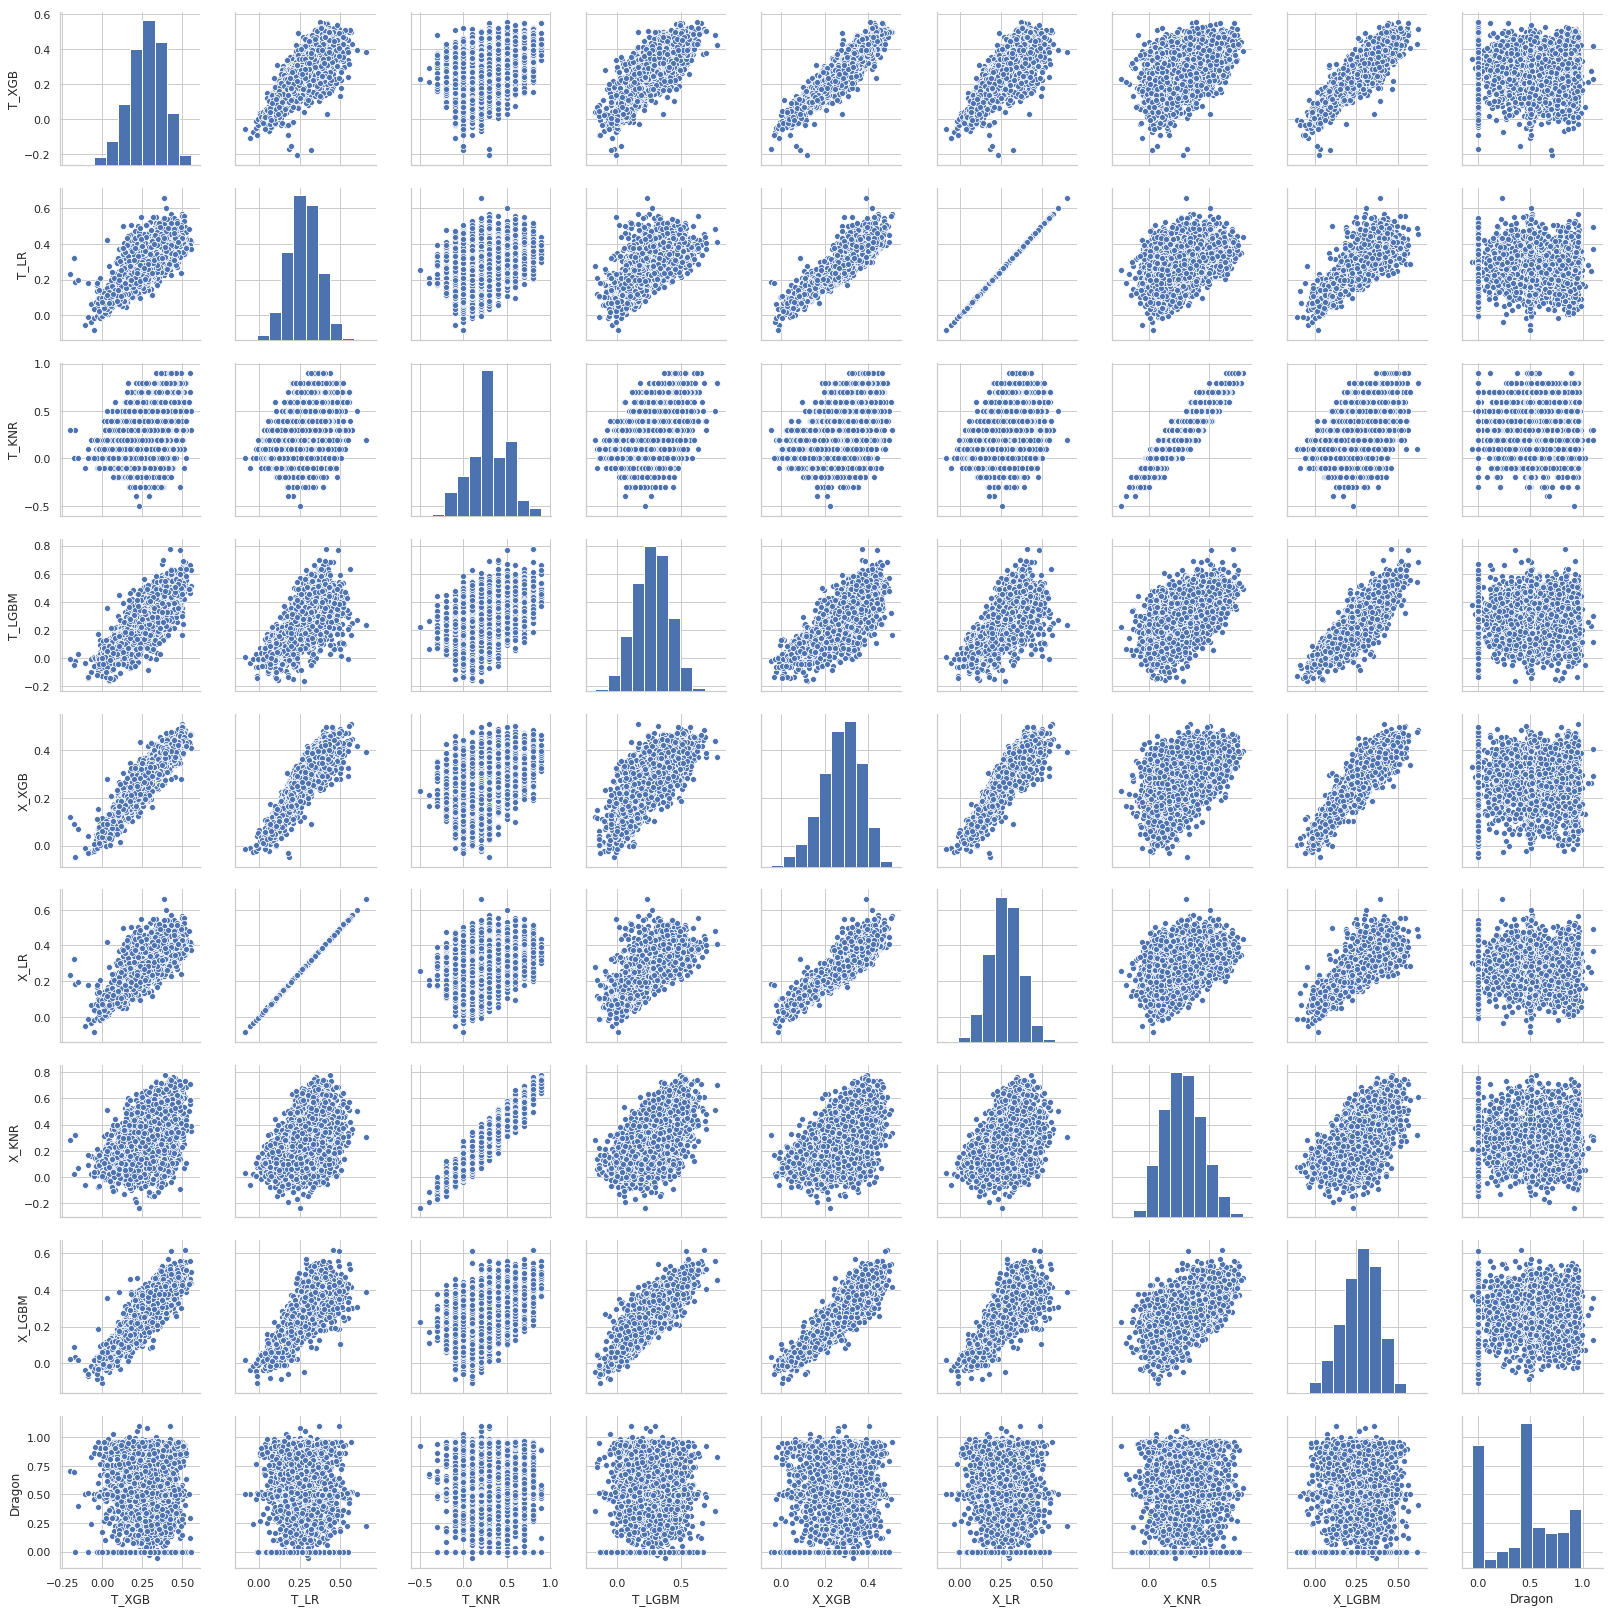

In [76]:
predictions_df = pred_df.iloc[:,-9:]
sns.pairplot(predictions_df);

# Pick Top 3 Based on AUQC

In [105]:
result_dict = {}
model_list = predictions_df.columns
for i in model_list:
    x = auqc(y_true=pred_df['conversion_post'], uplift=pred_df[i], treatment=pred_df['exposed'])
    result_dict.update({i : x})

In [116]:
pd.DataFrame.from_dict(result_dict, orient='index',columns=['AUQC']).sort_values(by='AUQC', ascending=False)

,AUQC
X_LGBM,2103431
X_XGB,2094536
T_LR,2068680
X_LR,2068680
T_LGBM,2057984
T_XGB,2042380
X_KNR,1979139
T_KNR,1890886
Dragon,1542797


# X_LGBM

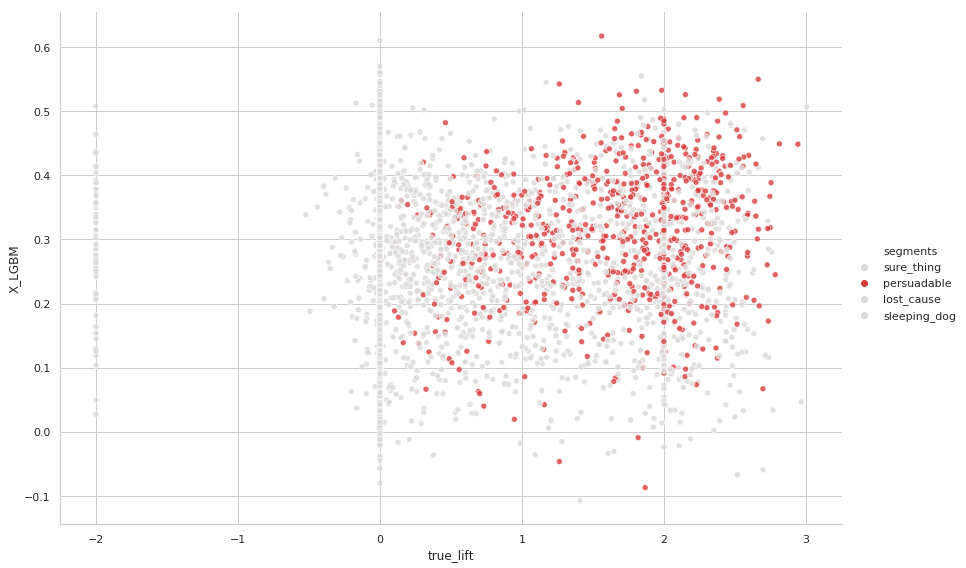

In [98]:
my_pal = {"sure_thing": "#dbd7d7", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#dbd7d7'}
sns.relplot(x="true_lift", y="X_LGBM",
            hue="segments",palette=my_pal, data=pred_df, height=8, aspect=1.5, alpha=0.80);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c703002b0>,
      dtype=object)

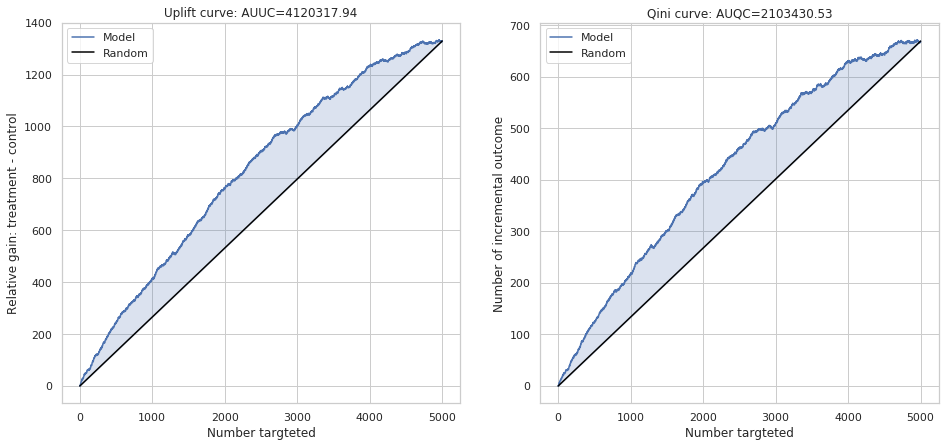

In [99]:
plot_uplift_qini_curves(y_true=pred_df['conversion_post'], uplift=pred_df['X_LGBM'], treatment=pred_df['exposed'])

In [133]:
##Assumptions 
budget = 1000 #budget per 5,000 customers
conversion_profit = 100 #Typical profit generated from a sale
cost_per_ad = 4 #cost to treat a customer with an advertisment
treatment_total = int(budget/cost_per_ad)

random_df = pred_df[pred_df["exposed"] == 1].sample(treatment_total, random_state=847)
prediction_df = pred_df[pred_df["exposed"] == 1].sort_values("X_LGBM",ascending=False).head(treatment_total)

random_p_count = random_df[random_df['segments']=='persuadable']['conversion_post'].sum()
prediction_p_count = prediction_df[prediction_df['segments']=='persuadable']['conversion_post'].sum()
if treatment_total <= pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum():
    perfect_p_count = treatment_total
else:
    perfect_p_count = pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum()
    
    
random_roi = (random_p_count*conversion_profit)- budget
prediction_roi = (prediction_p_count*conversion_profit)- budget
perfect_roi = (perfect_p_count*conversion_profit)- budget
        
print('Treatment Total: {:0,.0f}'.format(treatment_total))
print('Random ROI: ${:0,.0f}'.format(random_roi))
print('Model ROI: ${:0,.0f}'.format(prediction_roi))
print('Perfect ROI: ${:0,.0f}'.format(perfect_roi))

print('Improvement from random: {:.2f}%'.format(((prediction_roi-random_roi)/random_roi)*100))
print('Incremental conversions from random: {}'.format(prediction_p_count-random_p_count))
print('Model to perfect ratio: {:.2f}%'.format((prediction_roi/perfect_roi)*100))

Treatment Total: 250
Random ROI: $7,200
Model ROI: $11,200
Perfect ROI: $24,000
Improvement from random: 55.56%
Incremental conversions from random: 40
Model to perfect ratio: 46.67%


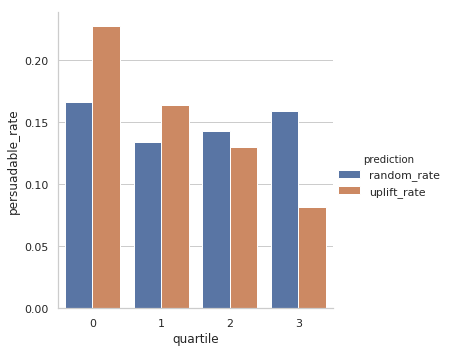

In [134]:
rand1 = pred_df[pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.75)]
rand2 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.75))  & 
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.50))]
rand3 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.50))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.25))]
rand4 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.25))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.0))]

rand1_p_count = len(rand1[rand1['segments']=='persuadable'])/len(rand1['segments'])
rand2_p_count = len(rand2[rand2['segments']=='persuadable'])/len(rand2['segments'])
rand3_p_count = len(rand3[rand3['segments']=='persuadable'])/len(rand3['segments'])
rand4_p_count = len(rand4[rand4['segments']=='persuadable'])/len(rand4['segments'])

random_rates = pd.DataFrame([rand1_p_count,rand2_p_count,rand3_p_count,rand4_p_count],columns=['random_rate'])

uplift1 = pred_df[pred_df['X_LGBM'] > pred_df['X_LGBM'].quantile(q=.75)]
uplift2 = pred_df[(pred_df['X_LGBM'] <= pred_df['X_LGBM'].quantile(q=.75))  & 
                  (pred_df['X_LGBM'] > pred_df['X_LGBM'].quantile(q=.50))]
uplift3 = pred_df[(pred_df['X_LGBM'] <= pred_df['X_LGBM'].quantile(q=.50))  &
                  (pred_df['X_LGBM'] > pred_df['X_LGBM'].quantile(q=.25))]
uplift4 = pred_df[(pred_df['X_LGBM'] <= pred_df['X_LGBM'].quantile(q=.25))  &
                  (pred_df['X_LGBM'] > pred_df['X_LGBM'].quantile(q=.0))]

uplift1_p_count = len(uplift1[uplift1['segments']=='persuadable'])/len(uplift1['segments'])
uplift2_p_count = len(uplift2[uplift2['segments']=='persuadable'])/len(uplift2['segments'])
uplift3_p_count = len(uplift3[uplift3['segments']=='persuadable'])/len(uplift3['segments'])
uplift4_p_count = len(uplift4[uplift4['segments']=='persuadable'])/len(uplift4['segments'])
uplift_rates = pd.DataFrame([uplift1_p_count,uplift2_p_count,uplift3_p_count,uplift4_p_count],columns=['uplift_rate'])

persuade_rate_df = pd.merge(random_rates,uplift_rates, left_index=True, right_index=True)
persuade_rate_df = persuade_rate_df.reset_index()

persuade_rate_df2 = pd.melt(persuade_rate_df, id_vars='index', value_vars=['random_rate','uplift_rate'])

persuade_rate_df2 = persuade_rate_df2.rename(columns={'index':'quartile','value':'persuadable_rate','variable':'prediction'})

sns.catplot(x='quartile', y='persuadable_rate', hue='prediction', data=persuade_rate_df2, kind='bar');

## X_XGB

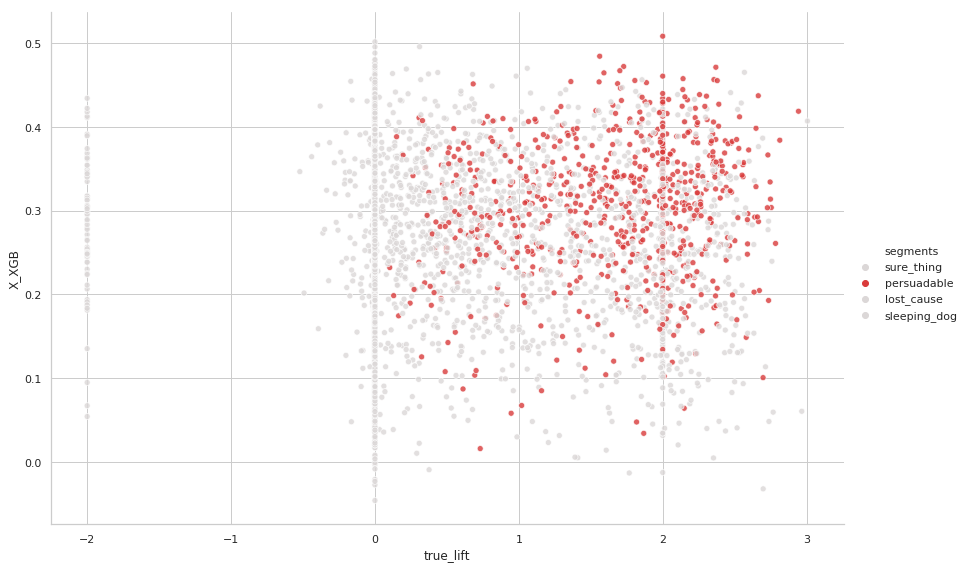

In [135]:
my_pal = {"sure_thing": "#dbd7d7", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#dbd7d7'}
sns.relplot(x="true_lift", y="X_XGB",
            hue="segments",palette=my_pal, data=pred_df, height=8, aspect=1.5, alpha=0.80);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ce4226898>,
      dtype=object)

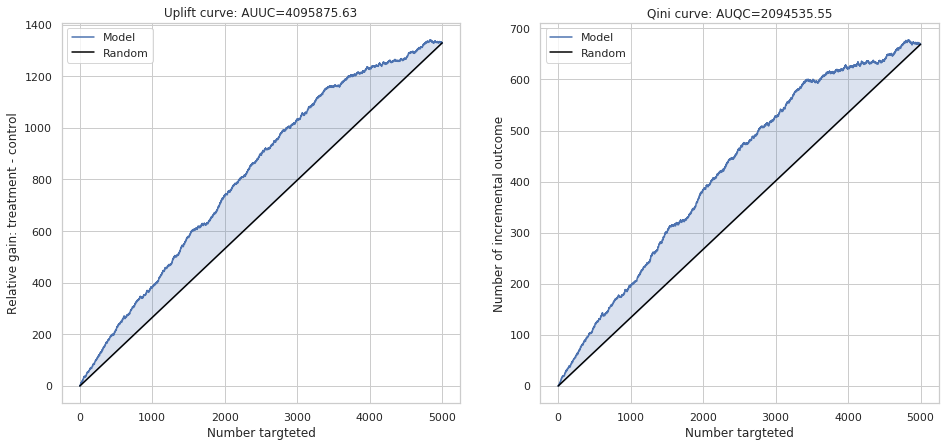

In [136]:
plot_uplift_qini_curves(y_true=pred_df['conversion_post'], uplift=pred_df['X_XGB'], treatment=pred_df['exposed'])

In [137]:
##Assumptions 
budget = 1000 #budget per 5,000 customers
conversion_profit = 100 #Typical profit generated from a sale
cost_per_ad = 4 #cost to treat a customer with an advertisment
treatment_total = int(budget/cost_per_ad)

random_df = pred_df[pred_df["exposed"] == 1].sample(treatment_total, random_state=847)
prediction_df = pred_df[pred_df["exposed"] == 1].sort_values("X_XGB",ascending=False).head(treatment_total)

random_p_count = random_df[random_df['segments']=='persuadable']['conversion_post'].sum()
prediction_p_count = prediction_df[prediction_df['segments']=='persuadable']['conversion_post'].sum()
if treatment_total <= pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum():
    perfect_p_count = treatment_total
else:
    perfect_p_count = pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum()
    
    
random_roi = (random_p_count*conversion_profit)- budget
prediction_roi = (prediction_p_count*conversion_profit)- budget
perfect_roi = (perfect_p_count*conversion_profit)- budget
        
print('Treatment Total: {:0,.0f}'.format(treatment_total))
print('Random ROI: ${:0,.0f}'.format(random_roi))
print('Model ROI: ${:0,.0f}'.format(prediction_roi))
print('Perfect ROI: ${:0,.0f}'.format(perfect_roi))

print('Improvement from random: {:.2f}%'.format(((prediction_roi-random_roi)/random_roi)*100))
print('Incremental conversions from random: {}'.format(prediction_p_count-random_p_count))
print('Model to perfect ratio: {:.2f}%'.format((prediction_roi/perfect_roi)*100))

Treatment Total: 250
Random ROI: $7,200
Model ROI: $9,100
Perfect ROI: $24,000
Improvement from random: 26.39%
Incremental conversions from random: 19
Model to perfect ratio: 37.92%


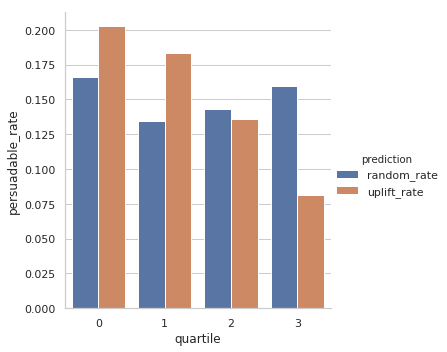

In [138]:
rand1 = pred_df[pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.75)]
rand2 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.75))  & 
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.50))]
rand3 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.50))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.25))]
rand4 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.25))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.0))]

rand1_p_count = len(rand1[rand1['segments']=='persuadable'])/len(rand1['segments'])
rand2_p_count = len(rand2[rand2['segments']=='persuadable'])/len(rand2['segments'])
rand3_p_count = len(rand3[rand3['segments']=='persuadable'])/len(rand3['segments'])
rand4_p_count = len(rand4[rand4['segments']=='persuadable'])/len(rand4['segments'])

random_rates = pd.DataFrame([rand1_p_count,rand2_p_count,rand3_p_count,rand4_p_count],columns=['random_rate'])

uplift1 = pred_df[pred_df['X_XGB'] > pred_df['X_XGB'].quantile(q=.75)]
uplift2 = pred_df[(pred_df['X_XGB'] <= pred_df['X_XGB'].quantile(q=.75))  & 
                  (pred_df['X_XGB'] > pred_df['X_XGB'].quantile(q=.50))]
uplift3 = pred_df[(pred_df['X_XGB'] <= pred_df['X_XGB'].quantile(q=.50))  &
                  (pred_df['X_XGB'] > pred_df['X_XGB'].quantile(q=.25))]
uplift4 = pred_df[(pred_df['X_XGB'] <= pred_df['X_XGB'].quantile(q=.25))  &
                  (pred_df['X_XGB'] > pred_df['X_XGB'].quantile(q=.0))]

uplift1_p_count = len(uplift1[uplift1['segments']=='persuadable'])/len(uplift1['segments'])
uplift2_p_count = len(uplift2[uplift2['segments']=='persuadable'])/len(uplift2['segments'])
uplift3_p_count = len(uplift3[uplift3['segments']=='persuadable'])/len(uplift3['segments'])
uplift4_p_count = len(uplift4[uplift4['segments']=='persuadable'])/len(uplift4['segments'])
uplift_rates = pd.DataFrame([uplift1_p_count,uplift2_p_count,uplift3_p_count,uplift4_p_count],columns=['uplift_rate'])

persuade_rate_df = pd.merge(random_rates,uplift_rates, left_index=True, right_index=True)
persuade_rate_df = persuade_rate_df.reset_index()

persuade_rate_df2 = pd.melt(persuade_rate_df, id_vars='index', value_vars=['random_rate','uplift_rate'])

persuade_rate_df2 = persuade_rate_df2.rename(columns={'index':'quartile','value':'persuadable_rate','variable':'prediction'})

sns.catplot(x='quartile', y='persuadable_rate', hue='prediction', data=persuade_rate_df2, kind='bar');

## T Learner Linear Regression

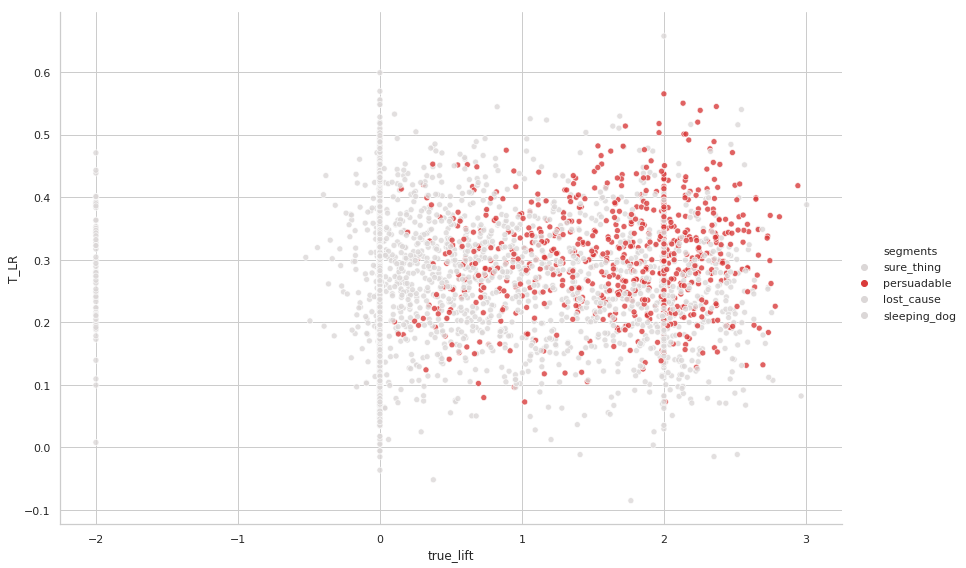

In [139]:
my_pal = {"sure_thing": "#dbd7d7", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#dbd7d7'}
sns.relplot(x="true_lift", y="T_LR",
            hue="segments",palette=my_pal, data=pred_df, height=8, aspect=1.5, alpha=0.80);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cb4541f60>,
      dtype=object)

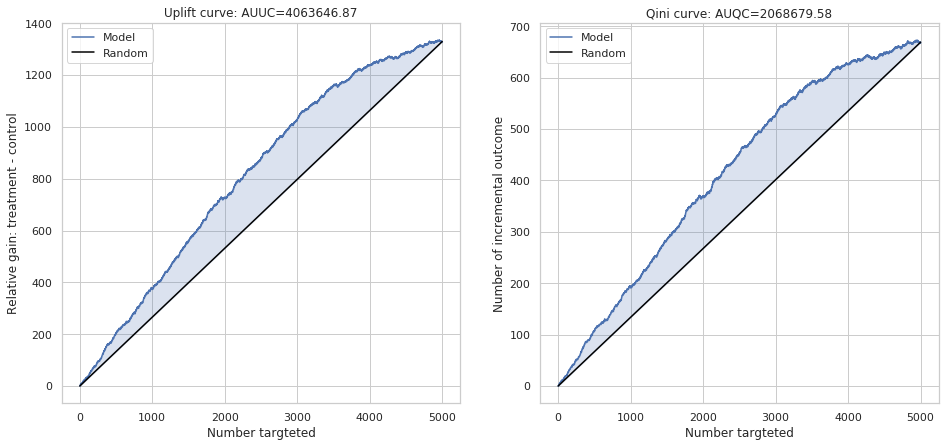

In [140]:
plot_uplift_qini_curves(y_true=pred_df['conversion_post'], uplift=pred_df['T_LR'], treatment=pred_df['exposed'])

In [141]:
##Assumptions 
budget = 1000 #budget per 5,000 customers
conversion_profit = 100 #Typical profit generated from a sale
cost_per_ad = 4 #cost to treat a customer with an advertisment
treatment_total = int(budget/cost_per_ad)

random_df = pred_df[pred_df["exposed"] == 1].sample(treatment_total, random_state=847)
prediction_df = pred_df[pred_df["exposed"] == 1].sort_values("T_LR",ascending=False).head(treatment_total)

random_p_count = random_df[random_df['segments']=='persuadable']['conversion_post'].sum()
prediction_p_count = prediction_df[prediction_df['segments']=='persuadable']['conversion_post'].sum()
if treatment_total <= pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum():
    perfect_p_count = treatment_total
else:
    perfect_p_count = pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum()
    
    
random_roi = (random_p_count*conversion_profit)- budget
prediction_roi = (prediction_p_count*conversion_profit)- budget
perfect_roi = (perfect_p_count*conversion_profit)- budget
        
print('Treatment Total: {:0,.0f}'.format(treatment_total))
print('Random ROI: ${:0,.0f}'.format(random_roi))
print('Model ROI: ${:0,.0f}'.format(prediction_roi))
print('Perfect ROI: ${:0,.0f}'.format(perfect_roi))

print('Improvement from random: {:.2f}%'.format(((prediction_roi-random_roi)/random_roi)*100))
print('Incremental conversions from random: {}'.format(prediction_p_count-random_p_count))
print('Model to perfect ratio: {:.2f}%'.format((prediction_roi/perfect_roi)*100))

Treatment Total: 250
Random ROI: $7,200
Model ROI: $8,600
Perfect ROI: $24,000
Improvement from random: 19.44%
Incremental conversions from random: 14
Model to perfect ratio: 35.83%


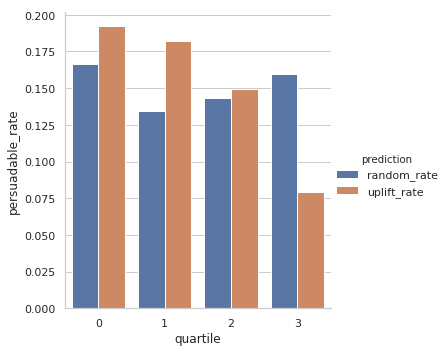

In [142]:
rand1 = pred_df[pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.75)]
rand2 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.75))  & 
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.50))]
rand3 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.50))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.25))]
rand4 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.25))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.0))]

rand1_p_count = len(rand1[rand1['segments']=='persuadable'])/len(rand1['segments'])
rand2_p_count = len(rand2[rand2['segments']=='persuadable'])/len(rand2['segments'])
rand3_p_count = len(rand3[rand3['segments']=='persuadable'])/len(rand3['segments'])
rand4_p_count = len(rand4[rand4['segments']=='persuadable'])/len(rand4['segments'])

random_rates = pd.DataFrame([rand1_p_count,rand2_p_count,rand3_p_count,rand4_p_count],columns=['random_rate'])

uplift1 = pred_df[pred_df['T_LR'] > pred_df['T_LR'].quantile(q=.75)]
uplift2 = pred_df[(pred_df['T_LR'] <= pred_df['T_LR'].quantile(q=.75))  & 
                  (pred_df['T_LR'] > pred_df['T_LR'].quantile(q=.50))]
uplift3 = pred_df[(pred_df['T_LR'] <= pred_df['T_LR'].quantile(q=.50))  &
                  (pred_df['T_LR'] > pred_df['T_LR'].quantile(q=.25))]
uplift4 = pred_df[(pred_df['T_LR'] <= pred_df['T_LR'].quantile(q=.25))  &
                  (pred_df['T_LR'] > pred_df['T_LR'].quantile(q=.0))]

uplift1_p_count = len(uplift1[uplift1['segments']=='persuadable'])/len(uplift1['segments'])
uplift2_p_count = len(uplift2[uplift2['segments']=='persuadable'])/len(uplift2['segments'])
uplift3_p_count = len(uplift3[uplift3['segments']=='persuadable'])/len(uplift3['segments'])
uplift4_p_count = len(uplift4[uplift4['segments']=='persuadable'])/len(uplift4['segments'])
uplift_rates = pd.DataFrame([uplift1_p_count,uplift2_p_count,uplift3_p_count,uplift4_p_count],columns=['uplift_rate'])

persuade_rate_df = pd.merge(random_rates,uplift_rates, left_index=True, right_index=True)
persuade_rate_df = persuade_rate_df.reset_index()

persuade_rate_df2 = pd.melt(persuade_rate_df, id_vars='index', value_vars=['random_rate','uplift_rate'])

persuade_rate_df2 = persuade_rate_df2.rename(columns={'index':'quartile','value':'persuadable_rate','variable':'prediction'})

sns.catplot(x='quartile', y='persuadable_rate', hue='prediction', data=persuade_rate_df2, kind='bar');

## T KNR

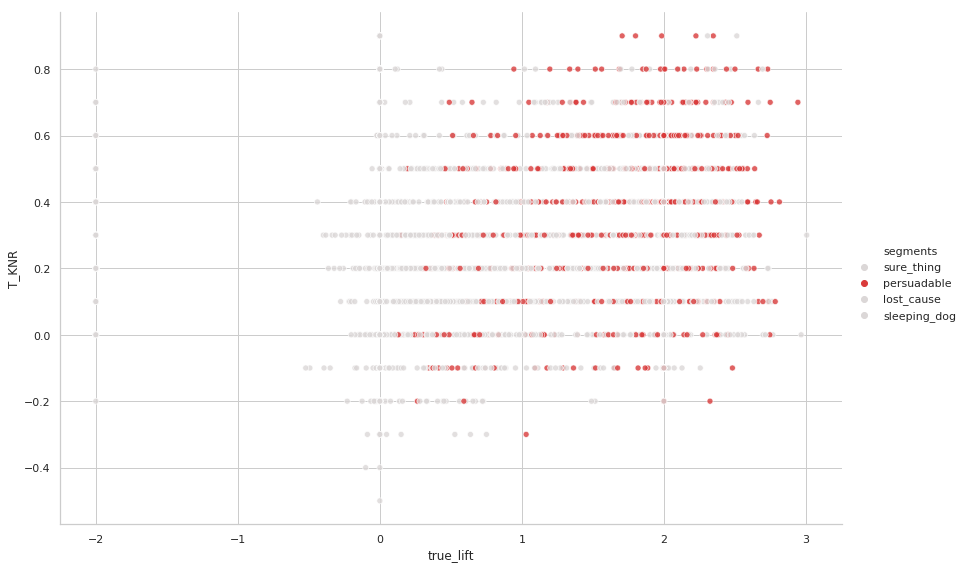

In [143]:
my_pal = {"sure_thing": "#dbd7d7", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#dbd7d7'}
sns.relplot(x="true_lift", y="T_KNR",
            hue="segments",palette=my_pal, data=pred_df, height=8, aspect=1.5, alpha=0.80);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ca87f8780>,
      dtype=object)

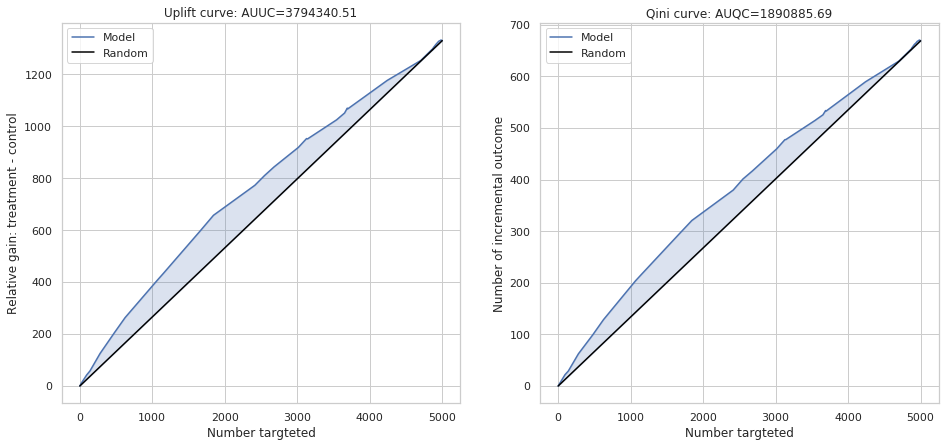

In [144]:
plot_uplift_qini_curves(y_true=pred_df['conversion_post'], uplift=pred_df['T_KNR'], treatment=pred_df['exposed'])

In [147]:
##Assumptions 
budget = 1000 #budget per 5,000 customers
conversion_profit = 100 #Typical profit generated from a sale
cost_per_ad = 4 #cost to treat a customer with an advertisment
treatment_total = int(budget/cost_per_ad)

random_df = pred_df[pred_df["exposed"] == 1].sample(treatment_total, random_state=847)
prediction_df = pred_df[pred_df["exposed"] == 1].sort_values("T_KNR",ascending=False).head(treatment_total)

random_p_count = random_df[random_df['segments']=='persuadable']['conversion_post'].sum()
prediction_p_count = prediction_df[prediction_df['segments']=='persuadable']['conversion_post'].sum()
if treatment_total <= pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum():
    perfect_p_count = treatment_total
else:
    perfect_p_count = pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum()
    
    
random_roi = (random_p_count*conversion_profit)- budget
prediction_roi = (prediction_p_count*conversion_profit)- budget
perfect_roi = (perfect_p_count*conversion_profit)- budget
        
print('Treatment Total: {:0,.0f}'.format(treatment_total))
print('Random ROI: ${:0,.0f}'.format(random_roi))
print('Model ROI: ${:0,.0f}'.format(prediction_roi))
print('Perfect ROI: ${:0,.0f}'.format(perfect_roi))

print('Improvement from random: {:.2f}%'.format(((prediction_roi-random_roi)/random_roi)*100))
print('Incremental conversions from random: {}'.format(prediction_p_count-random_p_count))
print('Model to perfect ratio: {:.2f}%'.format((prediction_roi/perfect_roi)*100))

Treatment Total: 250
Random ROI: $7,200
Model ROI: $12,000
Perfect ROI: $24,000
Improvement from random: 66.67%
Incremental conversions from random: 48
Model to perfect ratio: 50.00%


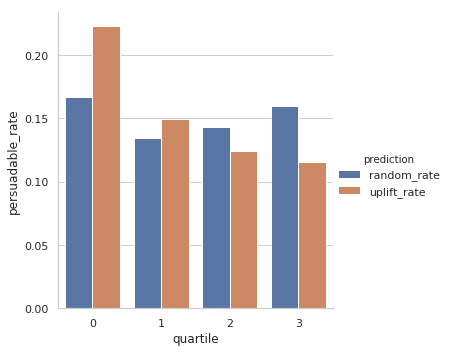

In [148]:
rand1 = pred_df[pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.75)]
rand2 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.75))  & 
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.50))]
rand3 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.50))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.25))]
rand4 = pred_df[(pred_df['random_prediction'] <= pred_df['random_prediction'].quantile(q=.25))  &
                  (pred_df['random_prediction'] > pred_df['random_prediction'].quantile(q=.0))]

rand1_p_count = len(rand1[rand1['segments']=='persuadable'])/len(rand1['segments'])
rand2_p_count = len(rand2[rand2['segments']=='persuadable'])/len(rand2['segments'])
rand3_p_count = len(rand3[rand3['segments']=='persuadable'])/len(rand3['segments'])
rand4_p_count = len(rand4[rand4['segments']=='persuadable'])/len(rand4['segments'])

random_rates = pd.DataFrame([rand1_p_count,rand2_p_count,rand3_p_count,rand4_p_count],columns=['random_rate'])

uplift1 = pred_df[pred_df['T_KNR'] > pred_df['T_KNR'].quantile(q=.75)]
uplift2 = pred_df[(pred_df['T_KNR'] <= pred_df['T_KNR'].quantile(q=.75))  & 
                  (pred_df['T_KNR'] > pred_df['T_KNR'].quantile(q=.50))]
uplift3 = pred_df[(pred_df['T_KNR'] <= pred_df['T_KNR'].quantile(q=.50))  &
                  (pred_df['T_KNR'] > pred_df['T_KNR'].quantile(q=.25))]
uplift4 = pred_df[(pred_df['T_KNR'] <= pred_df['T_KNR'].quantile(q=.25))  &
                  (pred_df['T_KNR'] > pred_df['T_KNR'].quantile(q=.0))]

uplift1_p_count = len(uplift1[uplift1['segments']=='persuadable'])/len(uplift1['segments'])
uplift2_p_count = len(uplift2[uplift2['segments']=='persuadable'])/len(uplift2['segments'])
uplift3_p_count = len(uplift3[uplift3['segments']=='persuadable'])/len(uplift3['segments'])
uplift4_p_count = len(uplift4[uplift4['segments']=='persuadable'])/len(uplift4['segments'])
uplift_rates = pd.DataFrame([uplift1_p_count,uplift2_p_count,uplift3_p_count,uplift4_p_count],columns=['uplift_rate'])

persuade_rate_df = pd.merge(random_rates,uplift_rates, left_index=True, right_index=True)
persuade_rate_df = persuade_rate_df.reset_index()

persuade_rate_df2 = pd.melt(persuade_rate_df, id_vars='index', value_vars=['random_rate','uplift_rate'])

persuade_rate_df2 = persuade_rate_df2.rename(columns={'index':'quartile','value':'persuadable_rate','variable':'prediction'})

sns.catplot(x='quartile', y='persuadable_rate', hue='prediction', data=persuade_rate_df2, kind='bar');